# 习惯知识和放弃曲线

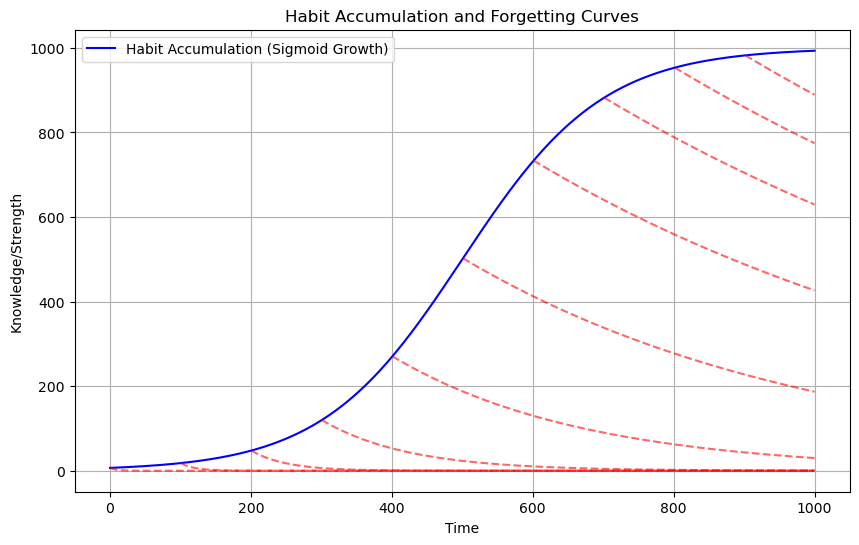

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 定义时间范围
t = np.linspace(0, 1000, 500)

# 习惯积累（Sigmoid增长）
H_max = 1000  # 最大习惯值
a = 0.01        # 增长速率
t_0 = 500     # 转折点
H = H_max / (1 + np.exp(-a * (t - t_0)))  # Sigmoid 曲线

# 定义遗忘衰减的基准速率和影响因子
b_0 = 0.5  # 基准遗忘速率
alpha = 0.5  # 控制积累量对遗忘速率的影响

# 计算遗忘曲线
F_curves = []

for i in range(0, len(t), 50):  # 每隔一定步长绘制遗忘曲线
    t_i = t[i]
    H_i = H[i]
    
    # 根据 H_i 计算遗忘衰减速率
    b = b_0 / (1 + alpha * H_i)  # 遗忘速率与习惯积累量相关
    
    # 遗忘曲线的时间范围
    forget_t = t[t >= t_i]
    forget_curve = H_i * np.exp(-b * (forget_t - t_i))  # 遗忘公式
    F_curves.append((forget_t, forget_curve))

# 绘图
plt.figure(figsize=(10, 6))

# 绘制习惯积累曲线（Sigmoid）
plt.plot(t, H, label="Habit Accumulation (Sigmoid Growth)", color="blue")

# 绘制每个点的遗忘曲线
for forget_t, forget_curve in F_curves:
    plt.plot(forget_t, forget_curve, color="red", linestyle="--", alpha=0.6)

plt.xlabel("Time")
plt.ylabel("Knowledge/Strength")
plt.title("Habit Accumulation and Forgetting Curves")
plt.legend()
plt.grid(True)
plt.show()
